<a href="https://colab.research.google.com/github/antoniomlo/Arquivos-Nuvem/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto COVID-19**

*by [Antonio Melo](https://github.com/antoniomlo/Data_Science/blob/main/README.md)*  

---
  

# **Panorama do COVID-19 no Brasil**
A **COVID-19** é uma doença causada por um vírus da família dos coronavírus. Registros da doença iniciaram-se no ano de 2019, mas a identificação do agente causador e as consequências dessa infecção só ocorreram no ano de 2020.

Responsável por causar febre, dificuldade respiratória e tosse, essa infecção assemelha-se a uma gripe. Entretanto, **a COVID-19 pode levar a complicações sérias e até mesmo à morte**, devendo ser, portanto, encarada como um grave problema de saúde pública.

 A transmissão da COVID-19 ocorre de uma pessoa para outra por meio do contato com gotículas respiratórias. Assim sendo, uma das medidas para se prevenir é **evitar locais com aglomerações** de pessoas.

<center><img alt="Colaboratory logo" width="100%" src="https://github.com/antoniomlo/Arquivos-Nuvem/blob/main/Projeto%20COVID/Panorama%20COVID-19.png?raw=true"></center>

**Neste notebook, ire análisar dados referentes a COVID-19 com o objetivo de elevar a consciência situacional a respeito da doença no Brasil e no mundo.**




# **Obtenção dos Dados**
Para fazer essa análise, utilizei os dados presentes no repositorio do [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data), portal que busca mostrar grandes problemas do mundo de forma acessível por meio da disponibilização desses dados com todas as informações necessárias.

Antes de inicar a análise, irei importar a base de dados e as devidas bibliotecas necessárias para começar.
  

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# **Análise Geral**

Nessa etapa irei colocar os seguintes objetivos para avançarmos para a próxima:
* **Ver as dimensões do dataset;**
* **Visualizar as 5 primeiras entradas;**
* **Visualizar os tipos das variáveis presentes;**
* **Escrever um pequeno Dicionário das variáveis;**
* **Tratar os dados;**





In [2]:
# para saber as dimensões do dataset
print(df.shape)

(161162, 67)


Vemos que esse dataset possui **161162 entradas** e **67 variáveis** diferentes.

In [3]:
# para visualizar as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# para visualizar os tipos das variáveis
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

## **Dicionário das Variáveis**

Como o dataset possui 67 variáveis diferentes, nessa etapa irei escrever **apenas as variáveis que irei utilizar no decorrer da Análise Exploratória**. Contudo, caso queira saber o que cada uma significa irei disponibilizar o link para o [Dicionário](https://github.com/owid/covid-19-data/tree/master/public/data) completo.

## **Tratamento de Dados**


Essa é uma etapa primordial de qualquer projeto. Antes de iniciar a Análise Exploratória é importantíssimo tratar os dados para que a análise seja feita da forma mais fiel possível. Logo, irei iniciar esse processo com a transformação das variáveis necessárias. 

### **Transformação de Variáveis**

Como foi observado acima, a variável `date`, que seria a data, está em formato de `objeto`. Abaixo irei transforma-la em formato de `data` para facilitar as pesquisas que serão feitas baseadas na data.

In [5]:
# transformando em data
df.date = pd.to_datetime(df.date, format='%Y/%m/%d')

### **Valores Nulos**


Aqui irei analisar a **porcentagem (%) de valores nulos** de cada variável e excluir algumas que não irei utilizar. Volto a falar, para saber o significado de todas as variáveis basta apertar no link disponibilizado na seção do **Dicionário das Váriáveis** acima.

In [6]:
# visualizando a quantidade de valores nulos
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

weekly_icu_admissions_per_million          96.782740
weekly_icu_admissions                      96.782740
excess_mortality_cumulative_per_million    96.569291
excess_mortality_cumulative                96.569291
excess_mortality_cumulative_absolute       96.569291
                                             ...    
total_cases                                 1.791986
population                                  0.653380
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

In [7]:
# excluindoo variáveis
df = df.drop(columns=['weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million',
                      'weekly_hosp_admissions','excess_mortality','excess_mortality_cumulative_absolute','excess_mortality_cumulative',
                      'total_boosters_per_hundred','total_boosters','excess_mortality_cumulative_per_million','icu_patients_per_million',
                      'icu_patients','hosp_patients_per_million','hosp_patients'])

In [8]:
dfp = df.drop(df.index[[64655	,48549,153845,8614,49300,108530,87406,135124,1446]])

In [9]:
print(df.shape)

(161162, 53)


Após o Tratamento de Dados o dataset ficou com **53 variáveis** e está pronto para ser utilizado na próxima etapa.

**Vamos nessa?**

# **Análise Exploratória** 

Essa é a etapa principal do projeto. A ***Análise Exploratória***... Nela irei mostrar alguns pontos principais da pandemia, como por exemplo:

*   **Número de Casos**
*   **Número de Mortes**
*   **Andamento da Vacinação**
*   **Análise do Brasil em relação ao mundo**

Vale ressaltar tambmém que para essa análise irei usar os **dados da COVID-19 até o dia  09/02/2022.**

Dentro de cada tópico, irei mostrar informações mais detalhadas sobre. Sem mais delongas, **vamos começar...**



## **Casos**

Nesta seção irei fazer uma mostrar os dados referentes ao número de casos da COVID-19 mundialmente falando e também um ranking dos países com mais casos.

### **Visão Geral**

In [10]:
# buscando o número total de casos
dfp.loc[dfp.date == '2022-02-09',['location','total_cases']].sort_values('total_cases', ascending=False)[:1]

,location,total_cases
159096,World,403305027.0


Com o código acima, podemos observar que no mundo o total de casos até a respectiva data (02-02-2022) foi de aproximadamente **403 Milhões**.

### **Países com Mais Casos**

In [11]:
# países com o maior numero de casos
dfp.loc[dfp.date == '2022-02-09',['location','total_cases']].sort_values('total_cases', ascending=False)[1:6]

,location,total_cases
153093,United States,77281158.0
68279,India,42478060.0
21358,Brazil,26972914.0
52928,France,21091589.0
152341,United Kingdom,18045697.0


Aqui acima, temos os **5 países com o maior número de casos do mundo.** Como podemos ver, os Estados Unidos lidera essa lista com aproximadamente **77 Milhões** de casos, enquanto o Brasil está com **27 Milhões**, ficando em terceiro lugar dessa lista até a respectiva data. Para facilitar a visualização desses dados, irei plotar um gráfico em barra abaixo.

In [12]:
top_casos = dfp.loc[dfp.date == '2022-02-09',['location','total_cases']].sort_values('total_cases', ascending=False)[1:6]

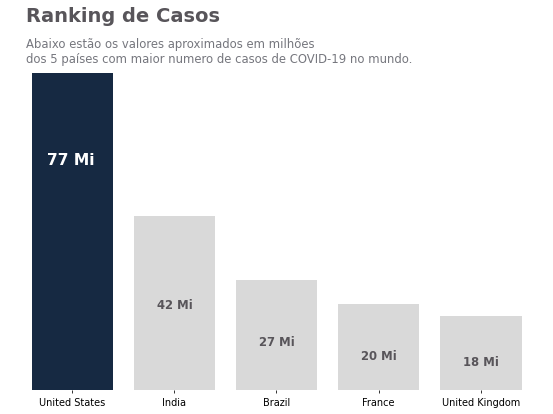

In [13]:
mycolor = ['#162942','#D9D9D9','#D9D9D9','#D9D9D9','#D9D9D9']

fig, ax = plt.subplots(figsize=(8,6), dpi=70)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(labels=[], set_visible=False)
ax.set_yticks(ticks=[])

ax.bar('location', 'total_cases', data = top_casos, color=mycolor);

ax.text(-0.45, 90000000,'Ranking de Casos',fontsize=20, fontweight='bold',color='#58555A')
ax.text(-0.45, 80000000,'Abaixo estão os valores aproximados em milhões\ndos 5 países com maior numero de casos de COVID-19 no mundo.',fontsize=12, color='#76777e')

ax.text(-0.25, 55000000,'77 Mi',fontsize=16, fontweight='bold', color='w')
ax.text(0.825, 20000000,'42 Mi',fontsize=12, fontweight='semibold', color='#58555A')
ax.text(1.825, 11000000,'27 Mi',fontsize=12, fontweight='semibold', color='#58555A')
ax.text(2.825, 7500000,'20 Mi',fontsize=12, fontweight='semibold', color='#58555A')
ax.text(3.825, 6000000,'18 Mi',fontsize=12, fontweight='semibold', color='#58555A')

plt.tight_layout()

## **Mortes**

**Por ser uma doença muito letal**, a COVID-19 vem deixando estrago por onde passa. O número de mortos já está muito alto porem ainda não sei exatamente... **Vamos Descobrir juntos?**

 Nesta etapa irei analisar o número de mortes mundialmente e mostrar os países que mais foram afetados em relação as mortes.

### **Visão Geral**

In [14]:
dfp.loc[dfp.date == '2022-02-09',['location','total_deaths']].sort_values('total_deaths', ascending=False)[:1]

,location,total_deaths
159096,World,5778017.0


Com o código acima, podemos observar que no mundo o total de mortes até a respectiva data (09-02-2022) foi de aproximadamente **5.8 Milhões**.

### **Países com Mais Mortes**

In [15]:
dfp.loc[dfp.date == '2022-02-09',['location','total_deaths']].sort_values('total_deaths', ascending=False)[1:6]

,location,total_deaths
153093,United States,912255.0
21358,Brazil,635421.0
68279,India,506520.0
120656,Russia,330609.0
95751,Mexico,310627.0


Aqui acima, temos os **5 países com o maior número de mortes do mundo.** Como podemos ver, os Estados Unidos lidera essa lista com aproximadamente **912 Mil** de mortes, enquanto o Brasil está com **635 Mil**, ficando em segundo lugar dessa lista até a respectiva data. Para facilitar a visualização desses dados, irei plotar um gráfico em barra abaixo.

In [16]:
top_mortes = dfp.loc[dfp.date == '2022-02-09',['location','total_deaths']].sort_values('total_deaths', ascending=False)[1:6]

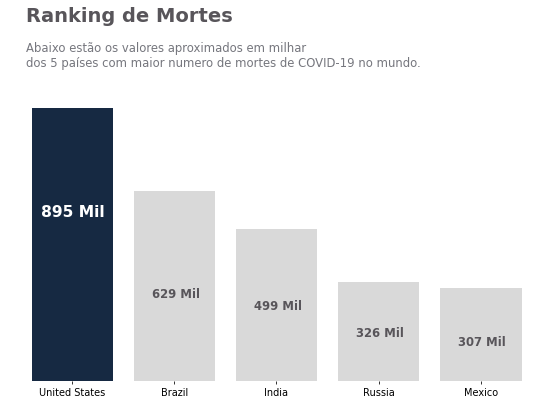

In [17]:
mycolor = ['#162942','#D9D9D9','#D9D9D9','#D9D9D9','#D9D9D9']

fig, ax = plt.subplots(figsize=(8,6), dpi=70)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(labels=[], set_visible=False)
ax.set_yticks(ticks=[])

ax.bar('location', 'total_deaths', data = top_mortes, color=mycolor);

ax.text(-0.45, 1200000,'Ranking de Mortes',fontsize=20, fontweight='bold',color='#58555A')
ax.text(-0.45, 1050000,'Abaixo estão os valores aproximados em milhar\ndos 5 países com maior numero de mortes de COVID-19 no mundo.',fontsize=12, color='#76777e')

ax.text(-0.31, 550000,'895 Mil',fontsize=16, fontweight='bold', color='w')
ax.text(0.78, 280000,'629 Mil',fontsize=12, fontweight='semibold', color='#58555A')
ax.text(1.78, 240000,'499 Mil',fontsize=12, fontweight='semibold', color='#58555A')
ax.text(2.78, 150000,'326 Mil',fontsize=12, fontweight='semibold', color='#58555A')
ax.text(3.78, 120000,'307 Mil',fontsize=12, fontweight='semibold', color='#58555A')

plt.tight_layout()

### **Média Móvel de Mortos**

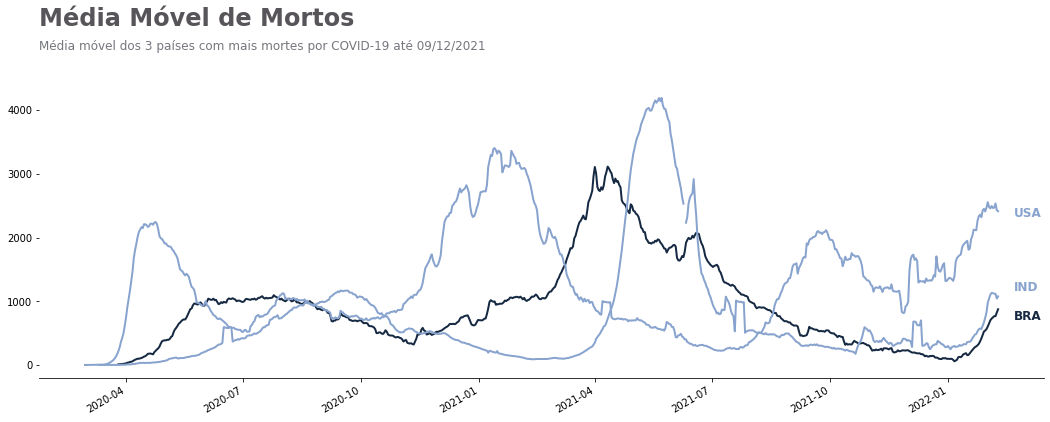

In [48]:
dev = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', index_col="date", parse_dates=True)

df_br = dev.loc[dev.location == 'Brazil'].sort_values(by="new_deaths_smoothed")
df_us = dev.loc[dev.location == 'United States'].sort_values(by="new_deaths_smoothed")
df_ind = dev.loc[dev.location == 'India'].sort_values(by="new_deaths_smoothed")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6), dpi=72)
df_br.loc['2020-03-26':'2022-02-09',"new_deaths_smoothed"].plot(kind="line", ax=ax, label="BRA",color="#162942", linewidth=2)
df_us.loc['2020-02-26':'2022-02-09',"new_deaths_smoothed"].plot(kind='line', ax=ax, linewidth=2, label="USA",color="#88A3CE")
df_ind.loc['2020-02-26':'2022-02-09',"new_deaths_smoothed"].plot(kind='line', ax=ax,linewidth=2, label="IND",color="#88A3CE")

ax.set_xlabel("")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.text(0, 1.2,'Média Móvel de Mortos',transform=ax.transAxes, fontsize=24, fontweight='bold',color='#58555A')
ax.text(0, 1.12,'Média móvel dos 3 países com mais mortes por COVID-19 até 09/12/2021',transform=ax.transAxes,fontsize=12, color='#76777e')

plt.text(0.97, 0.55,  "USA", transform=ax.transAxes, fontsize=12, fontweight='bold', color="#88A3CE")
plt.text(0.97, 0.2,  "BRA", transform=ax.transAxes, fontsize=12, fontweight='bold', color="#162942")
plt.text(0.97, 0.3,  "IND", transform=ax.transAxes, fontsize=12, fontweight='bold', color="#88A3CE")




plt.show()

In [19]:
dfp.loc[dfp.date == '2022-02-09',['location','new_deaths_smoothed']].sort_values('new_deaths_smoothed', ascending=False)[1:6]

,location,new_deaths_smoothed
153093,United States,2412.429
68279,India,1076.714
21358,Brazil,874.286
120656,Russia,660.429
95751,Mexico,529.571


Esta medida significa a média do número de mortes nos últimos 7 dias. 

Com esses dados é possível notar que mesmo após mais de 2 anos de pandemia **a média de mortes por semana nos Estados Unidos ainda permanece altíssima** em relação aos demais (aproximadamente **2412 mortes na última semana** ). Brasil por sua vez, segue em terceiro lugar com uma média móvel de **874 mortes.**

## **Relação entre Mortes e Casos**

Essa seção é apenas uma curiosidade para mostrar quantos % dos casos de COVID-19 terminaram em mortes até a respectiva data.

In [20]:
print(f'{(5777952.0 / 403258184.0 * 100):2f}%')

1.432817%


**Apenas 1,43% dos casos terminaram em mortes por COVID-19.**

## **Vacinação**

### **Visão Geral**



Nessa seção irei abordar uma análise da vacinação pelo mundo. Aqui você irá encontrar dados em relação ao número total de vacinas aplicadas, o ranking dos países que mais aplicaram a primeira dose e os que mais tem pessoas completamentes vacinadas. 

In [21]:
df.loc[df.date == '2022-02-09',['location','total_vaccinations','population','people_fully_vaccinated']].sort_values('total_vaccinations', ascending=False)[:1]

,location,total_vaccinations,population,people_fully_vaccinated
159096,World,1.024708e+10,7.874966e+09,4.228048e+09


In [22]:
print('Ranking Vacinação - Completamente Vacinados')	
print('Mundo - {:.2f}%'.format(4227825552.0 /7874965730.0* 100))	

Ranking Vacinação - Completamente Vacinados
Mundo - 53.69%


No mundo foram aplicadas ao todo, incluindo primeira, segunda e terceira dose, aproximadamente **10 Bilhões de vacinas** contra a COVID-19.

### **Primeira Dose**

In [23]:
dfp.loc[dfp.date == '2022-02-09',['location','people_vaccinated','population']].sort_values('people_vaccinated', ascending=False)[1:6]

,location,people_vaccinated,population
68279,India,954257234.0,1.393409e+09
153093,United States,251744689.0,3.329151e+08
68991,Indonesia,187290007.0,2.763618e+08
21358,Brazil,172995877.0,2.139934e+08
112468,Pakistan,113907970.0,2.251999e+08


Ranking esse que é por número de vacinação, não por porcentagem da população vacinada. O dado abaixo é apenas uma curiosidade, para informar a porcentagem da população dos países que mais aplicaram vacinas está vacinada com a primeira dose.

In [24]:
print('Ranking Vacinação - Primeira Dose')	
print('Brasil - {:.2f}%'.format(172995877.0 /213993441.0* 100))	
print('Estados Unidos - {:.2f}%'.format(251467303.0 /332915074.0* 100))	
print('India - {:.2f}%'.format(954257234.0	 /1393409033.0* 100))	
print('Indonesia - {:.2f}%'.format(187290007.0	 /276361788.0* 100))	
print('Pakistan - {:.2f}%'.format(113907970.0	 /225199929.0* 100))	


Ranking Vacinação - Primeira Dose
Brasil - 80.84%
Estados Unidos - 75.53%
India - 68.48%
Indonesia - 67.77%
Pakistan - 50.58%


### **Completamente Vacinados**



In [25]:
dfp.loc[dfp.date == '2022-02-09',['location','people_fully_vaccinated','population']].sort_values('people_fully_vaccinated', ascending=False)[1:6]

,location,people_fully_vaccinated,population
68279,India,740575198.0,1.393409e+09
153093,United States,212770937.0,3.329151e+08
21358,Brazil,151496825.0,2.139934e+08
68991,Indonesia,132667991.0,2.763618e+08
75499,Japan,99951484.0,1.260508e+08


In [26]:
print('Ranking Vacinação - Completamente Vacinados')	
print('Japão - {:.2f}%'.format(99837916.0 /126050796.0* 100))	
print('Brasil - {:.2f}%'.format(151496825.0 /213993441.0* 100))	
print('Estados Unidos - {:.2f}%'.format(212468219.0 /332915074.0* 100))	
print('India - {:.2f}%'.format(740575198.0 /1393409033.0* 100))	
print('Indonesia - {:.2f}%'.format(132667991.0 /276361788.0* 100))	

Ranking Vacinação - Completamente Vacinados
Japão - 79.20%
Brasil - 70.80%
Estados Unidos - 63.82%
India - 53.15%
Indonesia - 48.01%


## **Análise Exploratória - Brasil**

Nessa etapa irei analisar dados da COVID-19 em relação ao Brasil. Para isso, irei exibir estatísticas como o 1º Caso no país, a 1ª Morte e dados sobre a vacinação.

In [50]:
df_br = df.loc[df.location == "Brazil"].copy()

### **1º Caso no Brasil**

In [28]:
df_br.loc[df_br.new_cases == 1][:1]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20644,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


### **1ª Morte no Brasil**


In [51]:
df_br.loc[df_br.new_deaths == 1][:1]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
20664,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.5,0.565,0.194,0.005,0.005,0.001,2.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


### **Primeira Dose**

In [52]:
df_br.loc[df_br.date == '2022-02-09',['location','people_vaccinated','population']]

,location,people_vaccinated,population
21358,Brazil,172995877.0,213993441.0


In [55]:
print('Porcentagem de Vacinados - Primeira Dose')	
print('Brasil - {:.2f}%'.format(172995877.0 /213993441.0* 100))	

Porcentagem de Vacinados - Primeira Dose
Brasil - 80.84%


### **Completamente Vacinados**

In [53]:
df_br.loc[df_br.date == '2022-02-09',['location','people_fully_vaccinated','population']]

,location,people_fully_vaccinated,population
21358,Brazil,151496825.0,213993441.0


In [56]:
print('Porcentagem de Vacinados - Completamente Vacinados')	
print('Brazil - {:.2f}%'.format(151496825.0 /	213993441.0* 100))	

Porcentagem de Vacinados - Completamente Vacinados
Brazil - 70.80%


### **Vacinação em Relação ao Mundo**



In [33]:
dfp.loc[dfp.date == '2022-02-09',['location','total_vaccinations']].sort_values('total_vaccinations', ascending=False)[1:6]

,location,total_vaccinations
31306,China,3.022646e+09
68279,India,1.710024e+09
153093,United States,5.459371e+08
21358,Brazil,3.733317e+08
75499,Japan,2.114019e+08


## **Conclusão**

Após a **Análise Exploratória**, cheguei a coclusão que essa pesquisa tem uma enorme importancia para o entendimento de uma doença tão severa como a COVID-19. Nela, foi possível identificar dados como: 

*   **Quantidade de Casos**
*  **Quantidade de Mortos**
*  **Andamento da Vacinação**
*   **Brasil em Relação ao Mundo**

Nessas etapas, foi possível observar que os Estados Unidos lidera o Ranking de casos e mortes, com **77 Milhões** e **912 Mil**, respectivamente. Além disso, a India é o páis que mais vacinou... juntando a 1ª, 2ª e 3ª dose, o país conta com mais de **954 Milhões** de aplicações. Para finalizar, descobri também que o Brasil já conta com pouco mais de **70%** de sua população vacinada.

Por fim, espero que tenha gostado e se vacine e siga as recomendações acima para que possamos voltar a vida normal o mais rápido possivel.
